In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from pandas import *
import random

# I will be working with Option A.

In [6]:
def makePopulation(N,popSize): #N is genome size
    population=list()
    for p in range(popSize):
        genome=list()
        for n in range(N):
            genome.append(random.randint(0,1))
        population.append(genome)
    return population

print makePopulation(5,10)

[[1, 0, 0, 0, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 1, 0, 1], [0, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 1, 1, 0, 1], [1, 0, 1, 0, 1], [1, 0, 0, 1, 1]]


In [7]:
def computeFitness(genome):
    sumFitness=sum(genome)
    return sumFitness

print computeFitness([1,1,1,0,1])

4


In [8]:
def makeMutant(genome,mutationRate):
    newGenome=list()
    for i in range(len(genome)):
        if random.uniform(0.0,1.0)<mutationRate:
            newGenome.append(1-genome[i])
        else:
            newGenome.append(genome[i])
    return newGenome

random.seed(0)

for i in range(10):
    print makeMutant([0,0,0,0,0],0.3)

[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 1, 0]
[0, 1, 0, 1, 0]


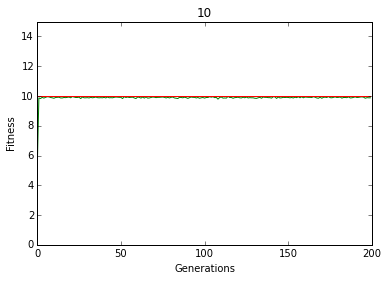

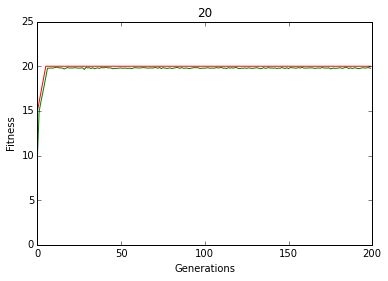

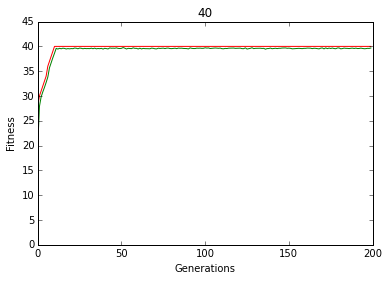

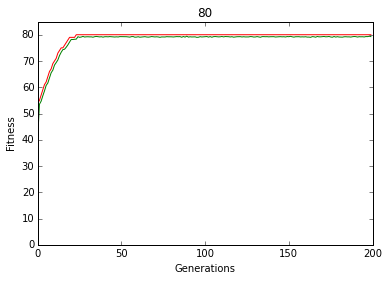

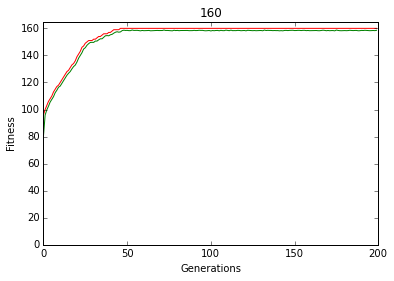

In [24]:
random.seed(0)
differentNs=[10,20,40,80,160]
for N in differentNs:
    #create a population
    popSize=100
    population=makePopulation(N,popSize)
    generations=200
    mutationRate=0.01

    meanW=list()
    maxW=list()

    for generation in range(generations):
        W=list()
        for i in range(len(population)):
            W.append(computeFitness(population[i]))


        nextGeneration=list()
        meanW.append(mean(W))
        highestFitness=max(W)
        maxW.append(highestFitness)

        while len(nextGeneration)<popSize:
            who=random.randint(0,popSize-1)
            while (random.uniform(0.0,1.0)>(W[who]/highestFitness)):
                who=random.randint(0,popSize-1)
            nextGeneration.append(makeMutant(population[who],mutationRate))
        population=list(nextGeneration)
    
    figure()
    title(str(N))
    plot(meanW,'g')
    plot(maxW,'r')
    ylim(0,(highestFitness+5))
    xlabel("Generations")
    ylabel("Fitness")

In [22]:
#scaled fitness by max fitness possible so can be more easily compared btw genomes of different sizes(b/c all on 0.0-1.0 scale)
def computeRelativeFitness(genome,N):
    maxFitnessPossible=N #maxFitnessPossible is same as size of genome are same b/c max fitness is when genome is all 1s
    sumFitness=float(sum(genome))/float(maxFitnessPossible) 
    return sumFitness

print computeRelativeFitness([0,0,1,1,1],5)

0.6


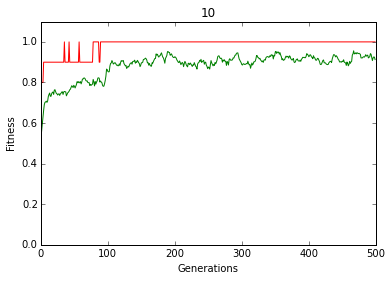

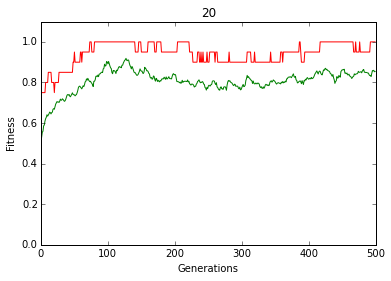

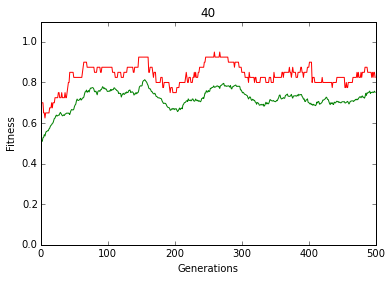

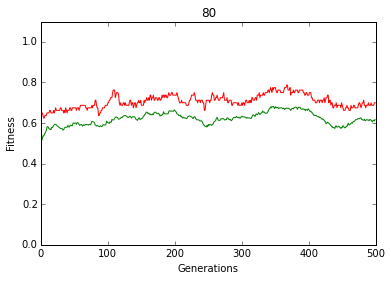

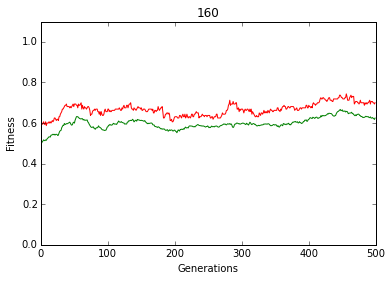

In [26]:
differentNs=[10,20,40,80,160]
for N in differentNs:
    #create a population
    popSize=100
    population=makePopulation(N,popSize)
    generations=500
    mutationRate=0.01

    meanW=list()
    maxW=list()

    for generation in range(generations):
        W=list()
        for i in range(len(population)):
            W.append(computeRelativeFitness(population[i],N))


        nextGeneration=list()
        meanW.append(mean(W))
        highestFitness=max(W)
        maxW.append(highestFitness)

        while len(nextGeneration)<popSize:
            who=random.randint(0,popSize-1)
            while (random.uniform(0.0,1.0)>(W[who]/highestFitness)):
                who=random.randint(0,popSize-1)
            nextGeneration.append(makeMutant(population[who],mutationRate))
        population=list(nextGeneration)
    
    figure()
    title(str(N))
    plot(meanW,'g')
    plot(maxW,'r')
    ylim(0,1.1)
    xlabel("Generations")
    ylabel("Fitness")

I wasn't sure if you wanted to see the graph of fitness on a 1.0 scale or not, so I tried to do both (not sure if I succeeded). Hopefully one of these is what you're looking for.

But it looks like large environments perform worse in this environment, in that it's harder and less likely that they'll reach the maximum fitness possible (or if they do it takes longer).